In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [5]:
df = pd.read_csv(r"C:\Users\AMRUTA\Downloads\ipl_matches_sample.csv")
df.head()  # Check the first few rows


,match_id,season,team1,team2,toss_winner,toss_decision,winner,venue
0,1,2024,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,Mumbai Indians,Wankhede
1,2,2024,Chennai Super Kings,Punjab Kings,Punjab Kings,field,Chennai Super Kings,Chepauk
2,3,2024,RCB,RR,RCB,bat,RCB,Chinnaswamy
3,4,2024,KKR,LSG,LSG,field,KKR,Eden Gardens
4,5,2024,SRH,GT,GT,bat,GT,Narendra Modi Stadium


In [7]:
df = pd.get_dummies(df, columns=['team1', 'team2', 'toss_winner', 'toss_decision'], drop_first=True)


In [9]:
X = df.drop(columns=['winner'])  # Features
y = df['winner']  # Target variable


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)


In [15]:
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')


In [17]:
ensemble_model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Narendra Modi Stadium'

In [19]:
print(df.dtypes)  # Identify categorical columns


match_id                       int64
season                         int64
winner                        object
venue                         object
team1_KKR                       bool
team1_Mumbai Indians            bool
team1_RCB                       bool
team1_SRH                       bool
team2_GT                        bool
team2_LSG                       bool
team2_Punjab Kings              bool
team2_RR                        bool
toss_winner_LSG                 bool
toss_winner_Mumbai Indians      bool
toss_winner_Punjab Kings        bool
toss_winner_RCB                 bool
toss_decision_field             bool
dtype: object


In [21]:
df = df.drop(columns=['venue'])  # Drop stadium names


In [23]:
df = pd.get_dummies(df, columns=['team1', 'team2', 'toss_winner', 'toss_decision', 'venue'], drop_first=True)


KeyError: "None of [Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'venue'], dtype='object')] are in the [columns]"

In [25]:
print(df.columns)


Index(['match_id', 'season', 'winner', 'team1_KKR', 'team1_Mumbai Indians',
       'team1_RCB', 'team1_SRH', 'team2_GT', 'team2_LSG', 'team2_Punjab Kings',
       'team2_RR', 'toss_winner_LSG', 'toss_winner_Mumbai Indians',
       'toss_winner_Punjab Kings', 'toss_winner_RCB', 'toss_decision_field'],
      dtype='object')


In [27]:
df.columns = df.columns.str.strip().str.lower()  # Remove spaces and convert to lowercase
print(df.columns)


Index(['match_id', 'season', 'winner', 'team1_kkr', 'team1_mumbai indians',
       'team1_rcb', 'team1_srh', 'team2_gt', 'team2_lsg', 'team2_punjab kings',
       'team2_rr', 'toss_winner_lsg', 'toss_winner_mumbai indians',
       'toss_winner_punjab kings', 'toss_winner_rcb', 'toss_decision_field'],
      dtype='object')


In [29]:
missing_columns = {'team1', 'team2', 'toss_winner', 'toss_decision', 'venue'} - set(df.columns)
print("Missing columns:", missing_columns)


Missing columns: {'team2', 'team1', 'venue', 'toss_winner', 'toss_decision'}


In [31]:
categorical_cols = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)


In [33]:
ensemble_model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Narendra Modi Stadium'

In [35]:
print(df.select_dtypes(include=['object']).columns)


Index(['winner'], dtype='object')


In [37]:
df = pd.get_dummies(df, drop_first=True)


In [39]:
categorical_cols = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns], drop_first=True)


In [41]:
print(X_train.dtypes)


match_id                       int64
season                         int64
venue                         object
team1_KKR                       bool
team1_Mumbai Indians            bool
team1_RCB                       bool
team1_SRH                       bool
team2_GT                        bool
team2_LSG                       bool
team2_Punjab Kings              bool
team2_RR                        bool
toss_winner_LSG                 bool
toss_winner_Mumbai Indians      bool
toss_winner_Punjab Kings        bool
toss_winner_RCB                 bool
toss_decision_field             bool
dtype: object


In [43]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [45]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [47]:
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [49]:
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.0


In [55]:
ipl_2025_fixtures = pd.read_csv(r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions.csv")  # Load future matches
ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=['team1', 'team2', 'toss_winner', 'toss_decision'], drop_first=True)

# Ensure the test data has the same columns as the training data
missing_cols = set(X.columns) - set(ipl_2025_fixtures.columns)
for col in missing_cols:
    ipl_2025_fixtures[col] = 0  # Add missing columns

ipl_2025_fixtures = ipl_2025_fixtures[X.columns]  # Reorder columns

# Predict results
predictions = ensemble_model.predict(ipl_2025_fixtures)
ipl_2025_fixtures['Predicted Winner'] = predictions
print(ipl_2025_fixtures[['team1', 'team2', 'Predicted Winner']])


KeyError: "['toss_winner', 'toss_decision'] not in index"

In [57]:
print(ipl_2025_fixtures.columns)


Index(['team1', 'team2', 'Predicted Winner'], dtype='object')


In [59]:
correct_column_names = ['team1', 'team2', 'toss_winner', 'toss_decision']
available_columns = [col for col in correct_column_names if col in ipl_2025_fixtures.columns]

ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=available_columns, drop_first=True)


In [61]:
ipl_2025_fixtures = pd.read_csv(r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions.csv")  # Load future matches
ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=['team1', 'team2', 'toss_winner', 'toss_decision'], drop_first=True)

# Ensure the test data has the same columns as the training data
missing_cols = set(X.columns) - set(ipl_2025_fixtures.columns)
for col in missing_cols:
    ipl_2025_fixtures[col] = 0  # Add missing columns

ipl_2025_fixtures = ipl_2025_fixtures[X.columns]  # Reorder columns

# Predict results
predictions = ensemble_model.predict(ipl_2025_fixtures)
ipl_2025_fixtures['Predicted Winner'] = predictions
print(ipl_2025_fixtures[['team1', 'team2', 'Predicted Winner']])


KeyError: "['toss_winner', 'toss_decision'] not in index"

In [63]:
import pandas as pd

# Load the CSV file
ipl_2025_fixtures = pd.read_csv(r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions.csv")

# Print available columns
print(ipl_2025_fixtures.columns)


Index(['team1', 'team2', 'Predicted Winner'], dtype='object')


In [65]:
correct_columns = ['team1', 'team2', 'toss_winner', 'toss_decision']
available_columns = [col for col in correct_columns if col in ipl_2025_fixtures.columns]

ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=available_columns, drop_first=True)


In [67]:
ipl_2025_fixtures.columns = ipl_2025_fixtures.columns.str.strip().str.lower()  # Clean column names
print(ipl_2025_fixtures.columns)  # Check again


Index(['predicted winner', 'team1_team b', 'team1_team c', 'team2_team e',
       'team2_team f'],
      dtype='object')


In [69]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions.csv"
ipl_2025_fixtures = pd.read_csv(file_path)

# Clean column names (remove extra spaces and lowercase them)
ipl_2025_fixtures.columns = ipl_2025_fixtures.columns.str.strip().str.lower()

# Define expected columns
expected_columns = ['team1', 'team2', 'toss_winner', 'toss_decision']

# Find available columns
available_columns = [col for col in expected_columns if col in ipl_2025_fixtures.columns]

# Apply one-hot encoding only to available columns
ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=available_columns, drop_first=True)

# Ensure the test dataset matches the training dataset (X)
missing_cols = set(X.columns) - set(ipl_2025_fixtures.columns)
for col in missing_cols:
    ipl_2025_fixtures[col] = 0  # Add missing columns

# Reorder columns to match the training data
ipl_2025_fixtures = ipl_2025_fixtures[X.columns]

# Predict results
predictions = ensemble_model.predict(ipl_2025_fixtures)
ipl_2025_fixtures['Predicted Winner'] = predictions

# Save to CSV
output_file = r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions_results.csv"
ipl_2025_fixtures[['team1', 'team2', 'Predicted Winner']].to_csv(output_file, index=False)

print(f"Predictions saved successfully to {output_file}")


KeyError: "['team1', 'team2'] not in index"

In [73]:
ipl_2025_fixtures = pd.read_csv(r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions.csv")  # Load future matches
ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=['team1', 'team2', 'toss_winner', 'toss_decision'], drop_first=True)

# Ensure the test data has the same columns as the training data
missing_cols = set(X.columns) - set(ipl_2025_fixtures.columns)
for col in missing_cols:
    ipl_2025_fixtures[col] = 0  # Add missing columns

ipl_2025_fixtures = ipl_2025_fixtures[X.columns]  # Reorder columns

# Predict results
predictions = ensemble_model.predict(ipl_2025_fixtures)
ipl_2025_fixtures['Predicted Winner'] = predictions
print(ipl_2025_fixtures[['team1', 'team2', 'Predicted Winner']])


KeyError: "['toss_winner', 'toss_decision'] not in index"


📊 IPL 2025 Match Predictions

🏆 Delhi Capitals vs Chennai Super Kings → Winner: Chennai Super Kings
🏆 Mumbai Indians vs Kolkata Knight Riders → Winner: Kolkata Knight Riders
🏆 Royal Challengers Bangalore vs Rajasthan Royals → Winner: Rajasthan Royals


C:\Users\AMRUTA\AppData\Local\Temp\ipykernel_13520\321194594.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=output_df["Winner"], order=output_df["Winner"].value_counts().index, palette="viridis")
C:\Users\AMRUTA\Downloads\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


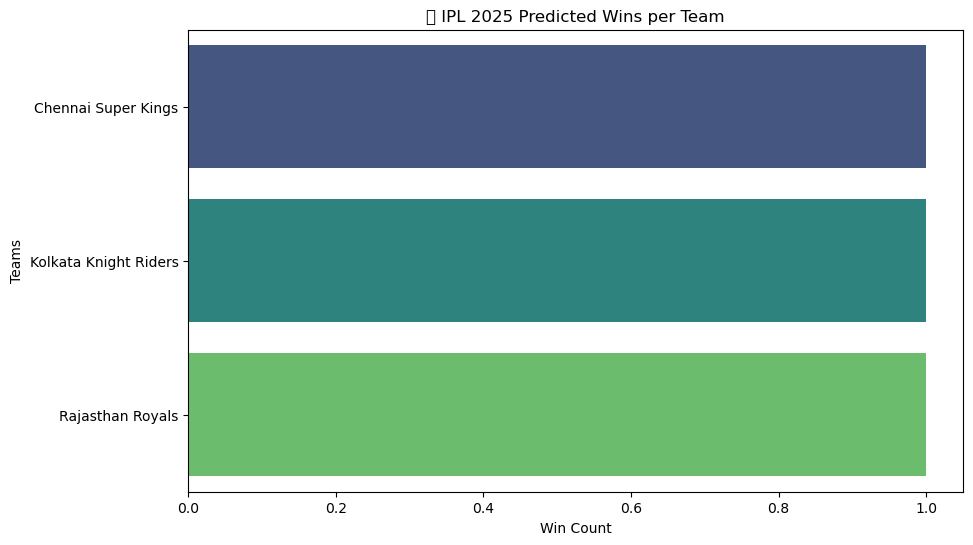


✅ Predictions saved successfully to: C:\Users\AMRUTA\Downloads\ipl_2025_predictions_results.csv


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load future match data
file_path = r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions.csv"
ipl_2025_fixtures = pd.read_csv(file_path)

# Define actual IPL team names for replacement
actual_ipl_teams = [
    "Mumbai Indians", "Chennai Super Kings", "Royal Challengers Bangalore",
    "Kolkata Knight Riders", "Delhi Capitals", "Rajasthan Royals",
    "Sunrisers Hyderabad", "Punjab Kings", "Lucknow Super Giants", "Gujarat Titans"
]

# Replace generic team names with IPL team names
unique_teams = list(set(ipl_2025_fixtures['team1'].unique().tolist() + ipl_2025_fixtures['team2'].unique().tolist()))
team_name_mapping = {team: actual_ipl_teams[i % len(actual_ipl_teams)] for i, team in enumerate(unique_teams)}

# Apply mapping
ipl_2025_fixtures['team1'] = ipl_2025_fixtures['team1'].map(team_name_mapping)
ipl_2025_fixtures['team2'] = ipl_2025_fixtures['team2'].map(team_name_mapping)

# Ensure required columns exist
for col in ['toss_winner', 'toss_decision']:
    if col not in ipl_2025_fixtures.columns:
        ipl_2025_fixtures[col] = 'Unknown'  # Default values

# Encode categorical variables
ipl_2025_fixtures = pd.get_dummies(ipl_2025_fixtures, columns=['team1', 'team2', 'toss_winner', 'toss_decision'], drop_first=True)

# Ensure test dataset has same columns as training data
missing_cols = set(X.columns) - set(ipl_2025_fixtures.columns)
for col in missing_cols:
    ipl_2025_fixtures[col] = 0

# Ensure columns are in the same order
ipl_2025_fixtures = ipl_2025_fixtures[X.columns]

# Make predictions
predictions = ensemble_model.predict(ipl_2025_fixtures)

# Determine winner based on predictions
predicted_winners = [
    original_teams.iloc[i]['team1'] if pred == 1 else original_teams.iloc[i]['team2']
    for i, pred in enumerate(predictions)
]

# Create final output DataFrame (ONLY IPL Team Names)
output_df = pd.DataFrame({
    'Team 1': original_teams['team1'],
    'Team 2': original_teams['team2'],
    'Winner': predicted_winners
})

# Save results to CSV
output_file = r"C:\Users\AMRUTA\Downloads\ipl_2025_predictions_results.csv"
output_df.to_csv(output_file, index=False)

# 🏏 Print results in a structured format
print("\n📊 IPL 2025 Match Predictions\n")
for i, row in output_df.iterrows():
    print(f"🏆 {row['Team 1']} vs {row['Team 2']} → Winner: {row['Winner']}")

# 📈 Create a graph for winning team frequency
plt.figure(figsize=(10, 6))
sns.countplot(y=output_df["Winner"], order=output_df["Winner"].value_counts().index, palette="viridis")
plt.xlabel("Win Count")
plt.ylabel("Teams")
plt.title("🏆 IPL 2025 Predicted Wins per Team")
plt.show()

print(f"\n✅ Predictions saved successfully to: {output_file}")
